In [1]:
# source: https://dwr.virginia.gov/wp-content/uploads/media/sunrise-sunset.pdf
# surely there's a more readable source of sunrise/sunset times...

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv('ric_sun_rise_set.csv')

In [5]:
df.head()

,day,jan_rise,jan_set,feb_rise,feb_set,mar_rise,mar_set,apr_rise,apr_set,may_rise,...,aug_rise,aug_set,sept_rise,sept_set,oct_rise,oct_set,nov_rise,nov_set,dec_rise,dec_set
0,1,7:25,5:02,7:14,5:33,6:41,6:03,6:56,7:32,6:15,...,6:14,8:17,6:41,7:38,7:06,6:52,6:35,5:11,7:06,4:52
1,2,7:25,5:03,7:13,5:34,6:40,6:04,6:54,7:33,6:14,...,6:15,8:16,6:41,7:37,7:07,6:51,6:36,5:10,7:07,4:52
2,3,7:25,5:04,7:12,5:35,6:39,6:05,6:53,7:34,6:12,...,6:16,8:15,6:42,7:35,7:08,6:49,6:37,5:09,7:08,4:51
3,4,7:25,5:04,7:11,5:37,6:37,6:06,6:51,7:35,6:11,...,6:17,8:14,6:43,7:34,7:08,6:48,6:38,5:08,7:09,4:51
4,5,7:25,5:05,7:10,5:38,6:36,6:07,6:50,7:36,6:10,...,6:18,8:13,6:44,7:32,7:09,6:46,6:40,5:07,7:10,4:51


In [20]:
month_index = {m.replace('_rise', ''): i for i, m in enumerate(df.loc[:, df.columns.str.endswith('_rise')].columns)}

In [77]:
# stack 
rises = df.loc[:, df.columns.str.endswith('_rise')]
rises.columns = [i+1 for i in range(len(rises.columns))] # switch back to month numbers for indexing
rises = rises.stack().swaplevel(0,1).sort_index()
rises.index.set_names(['month','day'], inplace=True)
rises = rises.apply(lambda x: float(x[0:x.find(':')]) + float(x[x.find(':')+1:])/60.0)

sets = df.loc[:, df.columns.str.endswith('_set')]
sets.columns = [i+1 for i in range(len(sets.columns))] 
sets = sets.stack().swaplevel(0,1).sort_index()
sets.index.set_names(['month','day'], inplace=True)
sets = sets.apply(lambda x: float(x[0:x.find(':')])+12 + float(x[x.find(':')+1:])/60.0) # convert to PM

In [78]:
df2 = pd.DataFrame(rises)
df2.columns = ['rises']
df2['sets'] = sets
df2 = df2.reset_index().reset_index()
df2.rename(columns={"index":"day_of_year"}, inplace=True)
df2['day_of_year'] = df2.day_of_year + 1
df2['day'] = df2.day + 1
df2.head()

,day_of_year,month,day,rises,sets
0,1,1,1,7.416667,17.033333
1,2,1,2,7.416667,17.050000
2,3,1,3,7.416667,17.066667
3,4,1,4,7.416667,17.066667
4,5,1,5,7.416667,17.083333


In [82]:
df2.to_csv('ric_sun_times.csv', index=False)

In [46]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Ric sunrise/sets')

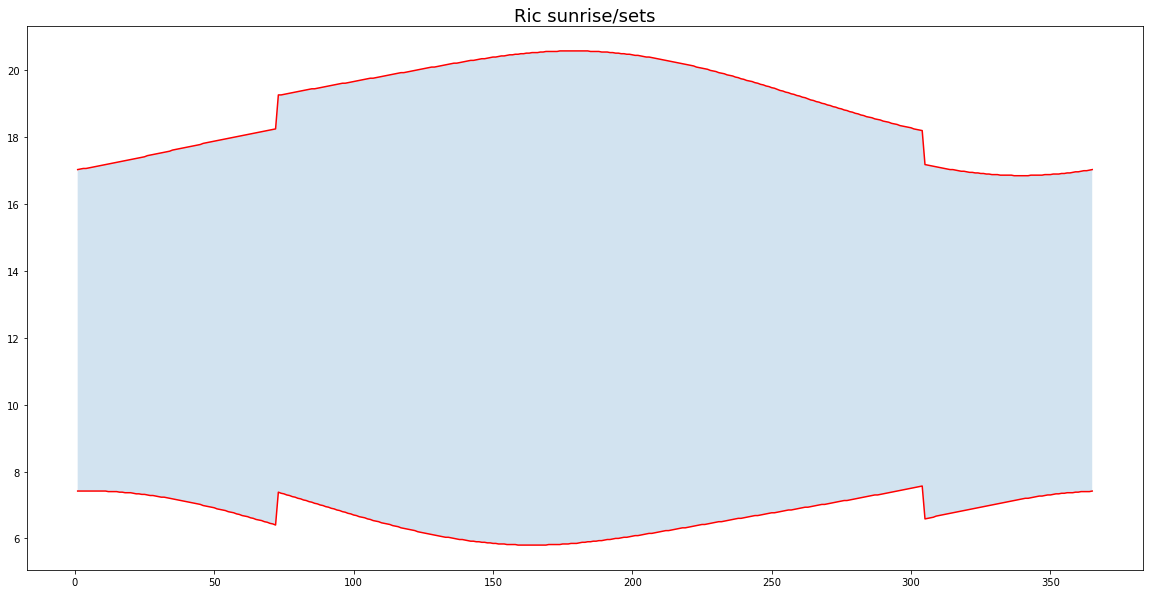

In [81]:
# 1 plot
fig, ax1 = plt.subplots(1, 1)

# set figure size in inches
fig.set_figheight(10)
fig.set_figwidth(20)


ax1.plot(df2.day_of_year, df2.sets, c="red")
ax1.plot(df2.day_of_year, df2.rises, c="red")
ax1.fill_between(df2.day_of_year, df2.rises, df2.sets, alpha=0.2)


ax1.set_title('Ric sunrise/sets', fontsize=18)

In [69]:
df2.loc[90:110,:]

,day_of_year,month,day,rises,sets
90,91,4,1,6:56,19:32
91,92,4,2,6:54,19:33
92,93,4,3,6:53,19:34
93,94,4,4,6:51,19:35
94,95,4,5,6:50,19:36
95,96,4,6,6:48,19:37
96,97,4,7,6:47,19:37
97,98,4,8,6:45,19:38
98,99,4,9,6:44,19:39
99,100,4,10,6:42,19:40
